In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz  
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-09-03 13:04:20--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.198
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  15.8MB/s    in 1.6s    

2019-09-03 13:04:22 (15.8 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-09-03 13:04:23--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.ama

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data 
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot = True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [ ]:
data_training = fashion_mnist.train.images
data_testing  = fashion_mnist.test.images 

<h2>Melihat Data

<h3>Jumlah data

In [ ]:
print("Jumlah Data Latih {}".format(data_training.shape[0]))
print("Jumlah Data Uji {}".format(data_testing.shape[0]))

Jumlah Data Latih 55000
Jumlah Data Uji 10000


<h3> Label

In [ ]:
df = pd.DataFrame(
              {"Label"    : [0,1,2,3,4,5,6,7,8,9],
              "Deksripsi": ["T-Shirt/Top","Trouser","Pullover","Dress","Coat",
                            "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]}
            )
df.style.hide_index()

Label,Deksripsi
0,T-Shirt/Top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle Boot


<h3> Jumlah Sebaran Label

In [ ]:
Label = input_data.read_data_sets('data/fashion').train.labels
Label2 = input_data.read_data_sets('data/fashion').test.labels

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [ ]:
label_count = []
for i in range(10):
  label_count.append(sum(Label == i))
  
label_count2 = []
for i in range(10):
  label_count2.append(sum(Label2 == i))
  
label_name = ["T-Shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

pd.DataFrame({"Label ":label_name,"Count Tarining":label_count,"Count Testing":label_count2})


,Label,Count Tarining,Count Testing
0,T-Shirt/Top,5543,1000
1,Trouser,5444,1000
2,Pullover,5496,1000
3,Dress,5499,1000
4,Coat,5512,1000
5,Sandal,5507,1000
6,Shirt,5507,1000
7,Sneaker,5488,1000
8,Bag,5510,1000
9,Ankle Boot,5494,1000


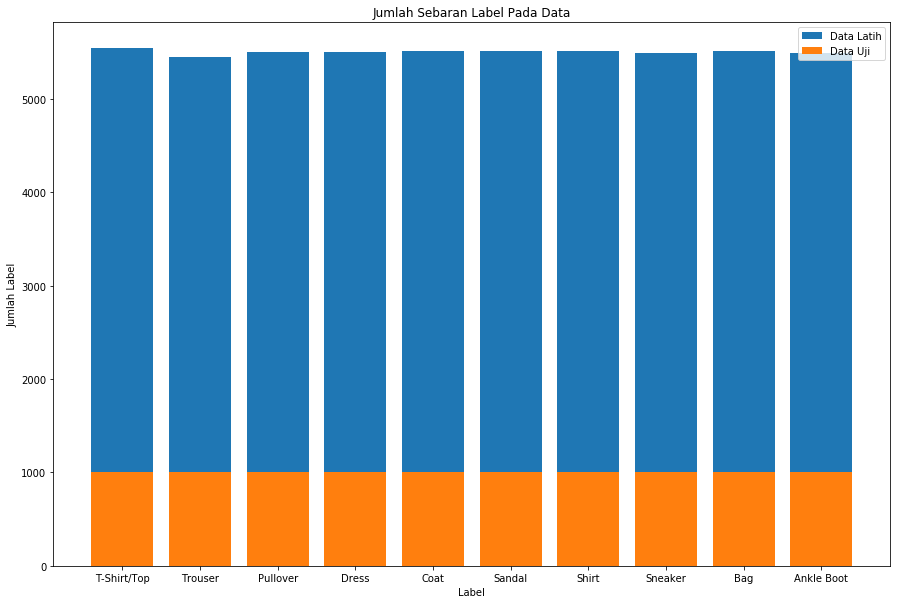

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(label_name,label_count,label="Data Latih")
plt.bar(label_name,label_count2, label="Data Uji")
plt.xlabel("Label")
plt.ylabel("Jumlah Label")
plt.title("Jumlah Sebaran Label Pada Data")
plt.legend(loc="best")
plt.show()

<h3>Visualisasi Data

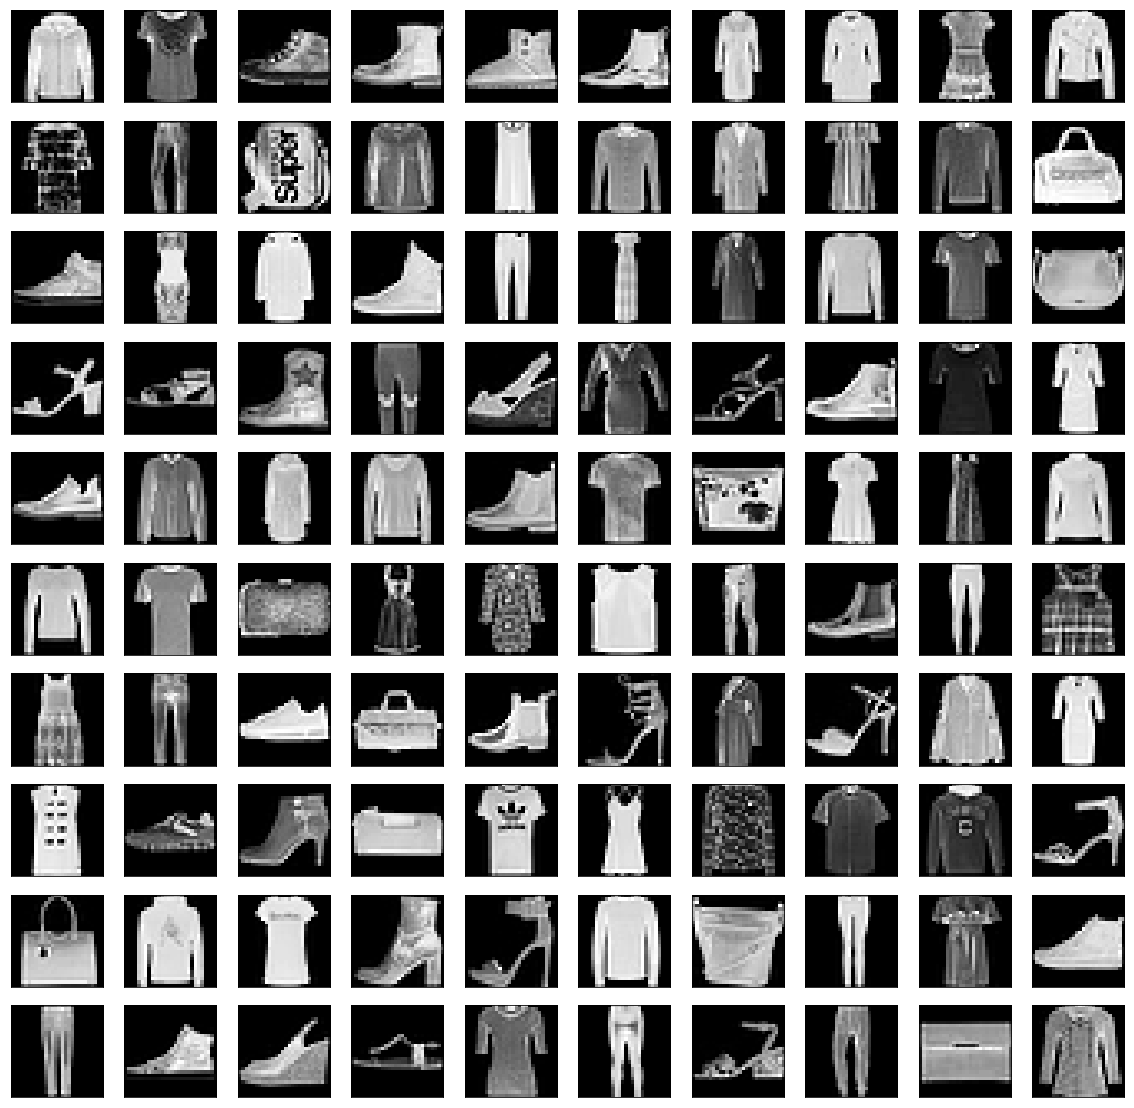

In [ ]:
row = 10
col = 10
fig, chart = plt.subplots(nrows=row,ncols=col,figsize=(20,20))
index_data = 0
for i in range(row):
  for j in range(col):
    plt.gray()
    chart[i][j].imshow(data_training[index_data].reshape([28,28]))
    chart[i][j].set_xticks([])
    chart[i][j].set_yticks([])
    index_data = index_data + 1

<h2>Membangun Model

<h3>Inisialisasi Parameter

In [ ]:
sess = tf.InteractiveSession()
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [ ]:
xtrain  = tf.placeholder(tf.float32, shape=[None, flat])
ytrain  = tf.placeholder(tf.float32, shape=[None, class_output])

In [ ]:
x_train_image = tf.reshape(xtrain, [-1,28,28,1])  

<h3>Convolutional Layer 1

In [ ]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [ ]:
convolve1= tf.nn.conv2d(x_train_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

In [ ]:
h_conv1 = tf.nn.relu(convolve1)

In [ ]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2

<h3>Fully Connected Layer 1

In [ ]:
layer_matrix = tf.reshape(conv1, [-1, 14*14*32])

In [ ]:
W_fc1 = tf.Variable(tf.truncated_normal([14 * 14 * 32, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [ ]:
fcl=tf.matmul(layer_matrix, W_fc1) + b_fc1

In [ ]:
h_fc1 = tf.nn.relu(fcl)

In [ ]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)

<h3> Fully Connected Layer 2

In [ ]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [ ]:
fc=tf.matmul(layer_drop, W_fc2) + b_fc2

In [ ]:
y_CNN= tf.nn.softmax(fc)

<h2> Melatih Model

In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ytrain * tf.log(y_CNN), reduction_indices=[1]))

In [ ]:
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(ytrain,1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

<h3>Training Model

In [ ]:
sess.run(tf.global_variables_initializer())
epoch = 6
for i in list(range(1,epoch+1)):
  for j in list(range(1,1100+1)):
    batch = fashion_mnist.train.next_batch(50)
    train_step.run(feed_dict={xtrain: batch[0], ytrain: batch[1], keep_prob: 0.5})
    if j%100 == 0 or j == 1:
        train_accuracy = accuracy.eval(feed_dict={xtrain:batch[0], ytrain: batch[1], keep_prob: 1.0})
        print("Epoch ke-{}, Iterasi ke-{}, Akurasi Training : {:g}".format(i,j,train_accuracy))
  test_accuracy = accuracy.eval(feed_dict={xtrain: fashion_mnist.test.images, ytrain: fashion_mnist.test.labels, keep_prob: 1.0})
  print("Epoch ke-{}, Akurasi Testing : {:g}".format(i,test_accuracy))
  print()


Epoch ke-1, Iterasi ke-1, Akurasi Training : 0.26
Epoch ke-1, Iterasi ke-100, Akurasi Training : 0.76
Epoch ke-1, Iterasi ke-200, Akurasi Training : 0.86
Epoch ke-1, Iterasi ke-300, Akurasi Training : 0.78
Epoch ke-1, Iterasi ke-400, Akurasi Training : 0.8
Epoch ke-1, Iterasi ke-500, Akurasi Training : 0.82
Epoch ke-1, Iterasi ke-600, Akurasi Training : 0.9
Epoch ke-1, Iterasi ke-700, Akurasi Training : 0.92
Epoch ke-1, Iterasi ke-800, Akurasi Training : 0.84
Epoch ke-1, Iterasi ke-900, Akurasi Training : 0.9
Epoch ke-1, Iterasi ke-1000, Akurasi Training : 0.86
Epoch ke-1, Iterasi ke-1100, Akurasi Training : 0.9
Epoch ke-1, Akurasi Testing : 0.8757

Epoch ke-2, Iterasi ke-1, Akurasi Training : 0.94
Epoch ke-2, Iterasi ke-100, Akurasi Training : 0.88
Epoch ke-2, Iterasi ke-200, Akurasi Training : 0.92
Epoch ke-2, Iterasi ke-300, Akurasi Training : 0.96
Epoch ke-2, Iterasi ke-400, Akurasi Training : 0.9
Epoch ke-2, Iterasi ke-500, Akurasi Training : 0.9
Epoch ke-2, Iterasi ke-600, Akuras

<h2>Visualisasi Per-Layer

<h3> Layer Convolusi 1

Kernel Konvolusi pertama

In [ ]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32,-1]))

<Figure size 432x288 with 0 Axes>

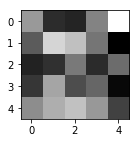

In [ ]:
plt.gray()
plt.figure(figsize=(2,2))
plt.imshow(kernels[2].reshape([5,5]))

output hasil konvolusi

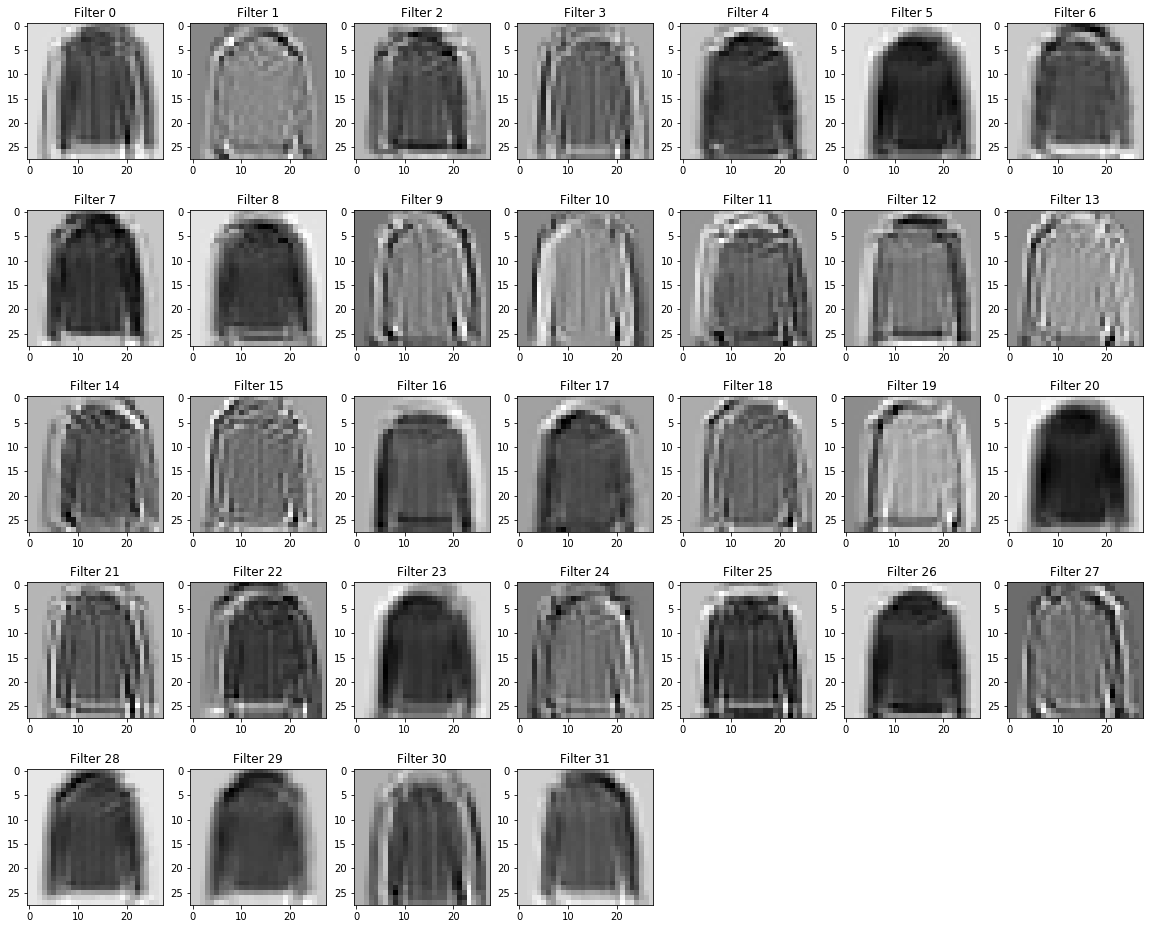

In [ ]:
X = sess.run(convolve1,feed_dict={xtrain:data_training[0].reshape([1,784],order='F')})
plt.figure(figsize=(20,20))
for i in range(32):
    plt.subplot(6,7, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(X[0,:,:,i], interpolation="nearest", cmap="gray")

output hasil relu

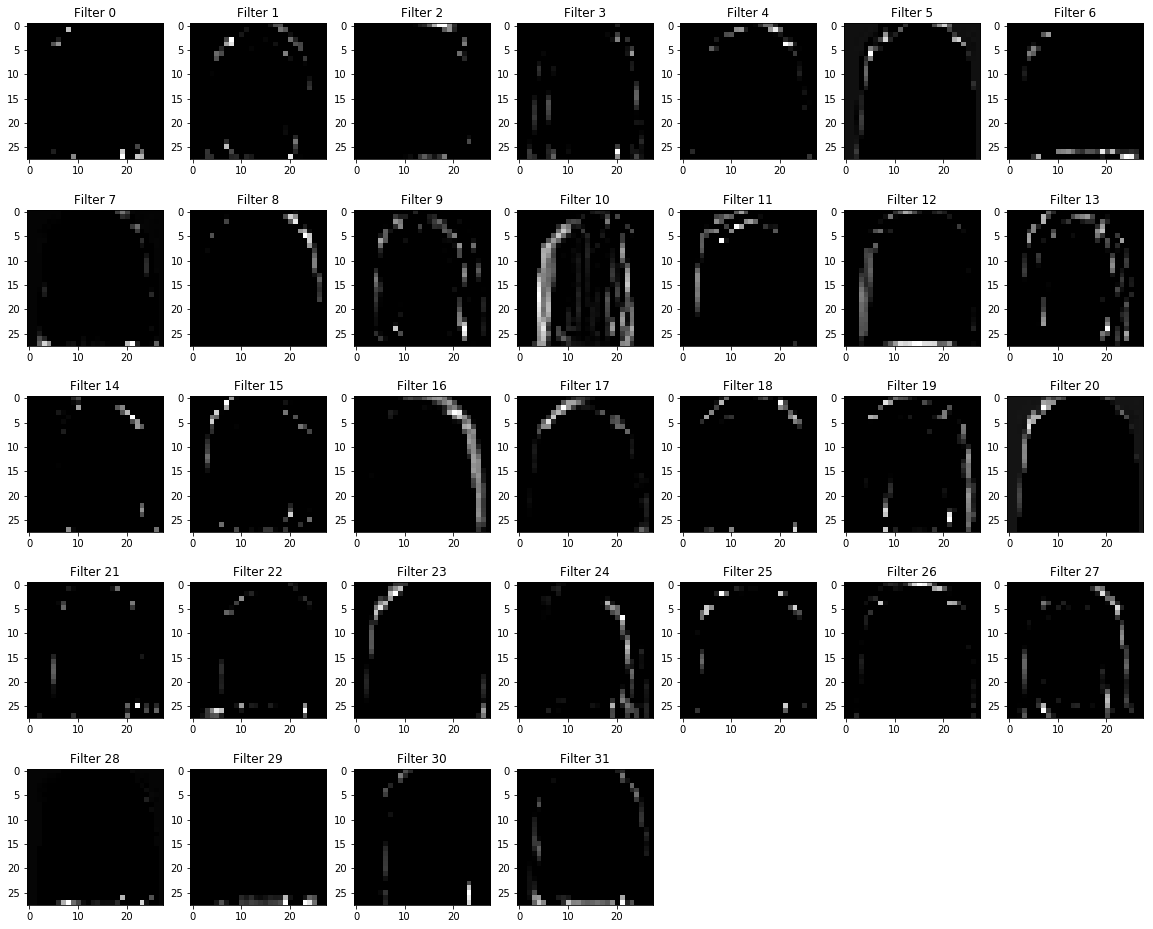

In [ ]:
Y = sess.run(h_conv1,feed_dict={xtrain:data_training[0].reshape([1,784],order='F')})
plt.figure(figsize=(20,20))
for i in range(32):
    plt.subplot(6, 7, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(Y[0,:,:,i], interpolation="nearest", cmap="gray")

output hasil max poling

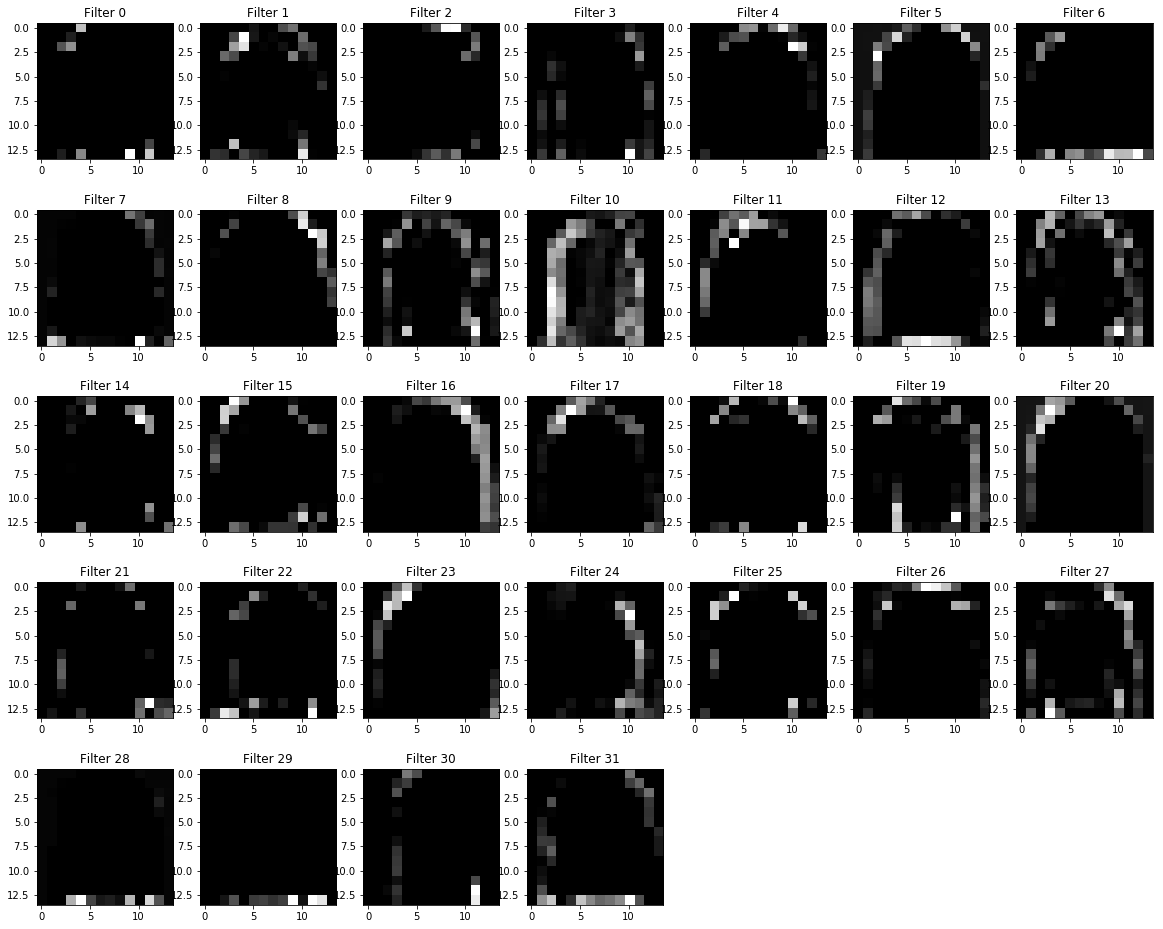

In [ ]:
Z = sess.run(conv1,feed_dict={xtrain:data_training[0].reshape([1,784],order='F')})
plt.figure(figsize=(20,20))
for i in range(32):
    plt.subplot(6, 7, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(Z[0,:,:,i], interpolation="nearest", cmap="gray")

<h1>Prediksi Gambar

In [ ]:
data = fashion_mnist.test

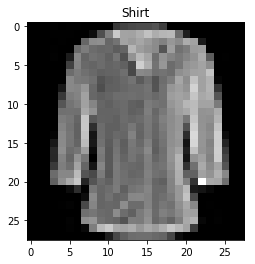

Prediksi CNN : Shirt
Aktual       : Shirt


In [ ]:
data_ke = 4
X = data.images[data_ke].reshape([28,28])
plt.title(label_name[Label2[data_ke]])
plt.imshow(X)
plt.show()

predict = sess.run(y_CNN,feed_dict={xtrain: data.images[data_ke].reshape([1,784]), ytrain: np.array([[0.,0.,0.,0.,0.,0.,1.,0.,0.,0.]]), keep_prob: 1.0})
class_output = sess.run(tf.argmax(predict,1))

print("Prediksi CNN : {}".format(label_name[class_output[0]]))
print("Aktual       : {}".format(label_name[Label2[data_ke]]))